In [1]:
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
import cv2
from matplotlib.patches import Rectangle
from skimage import io
%matplotlib inline

In [2]:
#Adding Images to database

image = io.imread('https://resize.indiatvnews.com/en/resize/newbucket/715_-/2020/01/shah-rukh-khan-1579698057.jpg')
SRK1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2 reads the image, where the order of color is in BGR format & not in RGB.

image = io.imread('https://cmsimages.tribuneindia.com/gallary_content/2020/8/2020_8$largeimg_1555925837.jpg')
AK = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = io.imread('https://static.toiimg.com/photo/msid-71756742/71756742.jpg?134917')
HR = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [3]:
SRK1E = face_recognition.face_encodings(SRK1)[0]
AKE = face_recognition.face_encodings(AK)[0]
HRE = face_recognition.face_encodings(HR)[0]

known_face_encodings = [SRK1E, AKE, HRE]

Found 5 face(s) in the input image


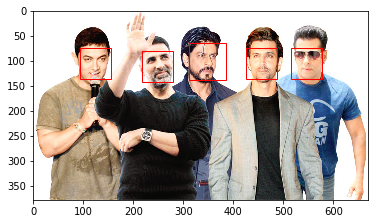

In [4]:
#For Input-Test Image

image = io.imread('https://images.mid-day.com/images/2015/jul/29-top-stars.jpg') #use cv2.imread() for reading image from local
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print("Found", number_of_faces, "face(s) in the input image")

plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    rect = Rectangle((x,y), w-x, h-y, fill=False, color = 'red')
    ax.add_patch(rect)
    
plt.show()

In [5]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
    results = []
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
        
    limit = 0.6
    results = np.array(results) <= limit
    
    name = 'Unknown'
    
    if results[0]:
        name = 'Shahrukh Khan'
    elif results[1]:
        name = 'Akshay Kumar'
    elif results[2]:
        name = 'Hritik Roshan'
        
    print("Found", name, "in the image!")

Found Shahrukh Khan in the image!
Found Unknown in the image!
Found Unknown in the image!
Found Hritik Roshan in the image!
Found Akshay Kumar in the image!
